# Justin's Workbook for Zillow Clustering Exploration

In [1]:
#imports
import pandas as pd
import numpy as np
import acquire
import prepare
import explore
from env import host, user, password

#Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn Tools and Modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Data Acquisition

In [2]:
#Acquire Data using acquire module and get_zillow_data function
df = acquire.get_zillow_data(cached=True)

#Return the shape of the dataframe
df.shape

(77413, 67)

In [3]:
len(df.parcelid.unique())

77413

## Data Preparation

In [4]:
df = prepare.wrangle_zillow()

In [5]:
df.shape

(44038, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44038 entries, 10711855 to 13102228
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   44038 non-null  float64
 1   bedroomcnt                    44038 non-null  float64
 2   buildingqualitytypeid         44038 non-null  float64
 3   calculatedfinishedsquarefeet  44038 non-null  float64
 4   latitude                      44038 non-null  float64
 5   longitude                     44038 non-null  float64
 6   propertyzoningdesc            44038 non-null  object 
 7   rawcensustractandblock        44038 non-null  float64
 8   regionidcity                  44038 non-null  float64
 9   regionidzip                   44038 non-null  float64
 10  roomcnt                       44038 non-null  float64
 11  structuretaxvaluedollarcnt    44038 non-null  float64
 12  landtaxvaluedollarcnt         44038 non-null  floa

In [7]:
df.head(1)

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidzip,...,logerror,LA,Orange,Ventura,age,taxrate,acres,cola,hot_month_sale,has_heat
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.0,3.0,8.0,2107.0,34.222559,-118.617387,LARE9,6.037113e+07,12447.0,96339.0,...,-0.007357,1,0,0,45.0,1.227188,0.210239,1,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44038 entries, 10711855 to 13102228
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   44038 non-null  float64
 1   bedroomcnt                    44038 non-null  float64
 2   buildingqualitytypeid         44038 non-null  float64
 3   calculatedfinishedsquarefeet  44038 non-null  float64
 4   latitude                      44038 non-null  float64
 5   longitude                     44038 non-null  float64
 6   propertyzoningdesc            44038 non-null  object 
 7   rawcensustractandblock        44038 non-null  float64
 8   regionidcity                  44038 non-null  float64
 9   regionidzip                   44038 non-null  float64
 10  roomcnt                       44038 non-null  float64
 11  structuretaxvaluedollarcnt    44038 non-null  float64
 12  landtaxvaluedollarcnt         44038 non-null  floa

## Data Exploration

### Check for Outliers

In [9]:
def outlier_label(x, lower, upper):
    if (lower >= x) or (x >= upper):
        return 1
    else:
        return 0

In [10]:
columns_to_check = ['bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'logerror', 'age', 'taxrate', 'acres']

for col in columns_to_check:
    quartile_01, quartile_03 = np.percentile(df[col], [25, 75])
    iqr = quartile_03 - quartile_01
    
    lower_bound = quartile_01 -(3 * iqr)
    upper_bound = quartile_03 +(3 * iqr)
    
    df['is_outlier'] = df[col].apply(lambda x: outlier_label(x, lower_bound, upper_bound))
    

    print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

The lower and upper bound of the range for 'bathroomcnt' respectively is: -1.0 and 6.0
The lower and upper bound of the range for 'bedroomcnt' respectively is: -4.0 and 10.0
The lower and upper bound of the range for 'calculatedfinishedsquarefeet' respectively is: -1288.0 and 4354.0
The lower and upper bound of the range for 'latitude' respectively is: 33.257196999999984 and 34.88872725000002
The lower and upper bound of the range for 'longitude' respectively is: -119.33409549999998 and -117.20248700000002
The lower and upper bound of the range for 'rawcensustractandblock' respectively is: 60361417.315 and 60386532.818001755
The lower and upper bound of the range for 'structuretaxvaluedollarcnt' respectively is: -287784.0 and 574525.0
The lower and upper bound of the range for 'landtaxvaluedollarcnt' respectively is: -765812.0 and 1165509.0
The lower and upper bound of the range for 'logerror' respectively is: -0.23121183741805 and 0.24421382574317496
The lower and upper bound of the r

In [11]:
df.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidzip', 'roomcnt', 'structuretaxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'logerror', 'LA', 'Orange', 'Ventura', 'age',
       'taxrate', 'acres', 'cola', 'hot_month_sale', 'has_heat', 'is_outlier'],
      dtype='object')

In [12]:
outliers = df['is_outlier'] == 1 # filter for outliers
df[outliers][['bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'logerror', 'age', 'taxrate', 'acres']].groupby('parcelid').head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,logerror,age,taxrate,acres
parcelid,,,,,,,,,,,,
10714531,3.0,4.0,2224.0,34.219815,-118.608787,6.037113e+07,280031.0,151665.0,0.036466,16.0,1.212837,2.232530
10714536,3.0,4.0,2233.0,34.220299,-118.609180,6.037113e+07,237900.0,287100.0,0.041154,16.0,1.209002,2.232530
10714563,3.0,4.0,2224.0,34.220897,-118.609434,6.037113e+07,244931.0,212631.0,0.056448,15.0,1.229639,2.142264
10714567,3.0,4.0,2224.0,34.221109,-118.609297,6.037113e+07,252600.0,267400.0,0.033151,15.0,1.225102,2.142264
10719969,2.0,2.0,1000.0,34.201600,-118.615000,6.037134e+07,98744.0,84318.0,0.025950,37.0,1.211234,1.820730
...,...,...,...,...,...,...,...,...,...,...,...,...
13100727,3.0,2.0,1295.0,33.984054,-117.865043,6.037403e+07,168734.0,217060.0,0.093538,41.0,1.242863,7.717057
13101300,3.0,5.0,3245.0,33.978608,-117.859416,6.037403e+07,362437.0,931981.0,0.088549,29.0,1.213280,2.794238
13102082,2.0,2.0,912.0,33.978300,-117.853000,6.037403e+07,117000.0,280000.0,0.036707,30.0,1.247484,4.576423


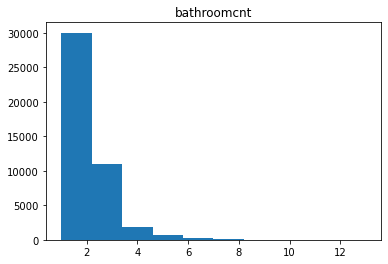

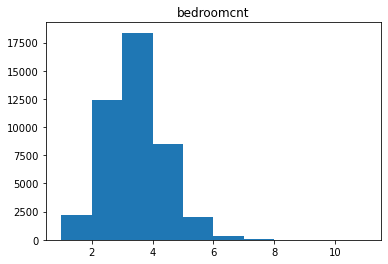

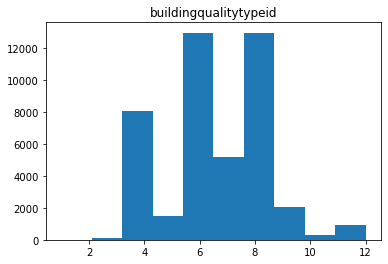

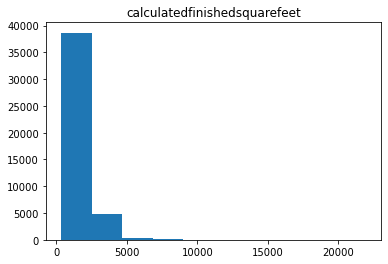

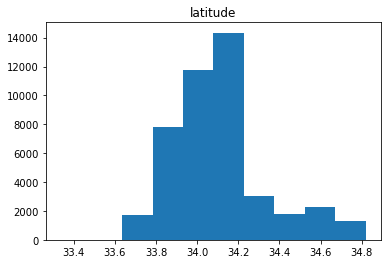

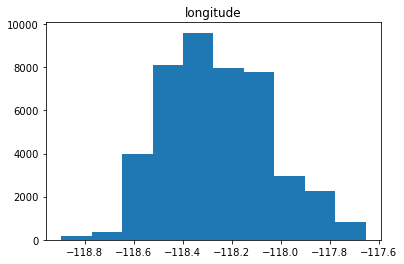

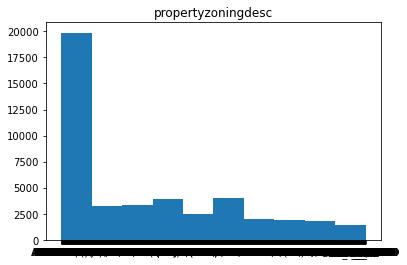

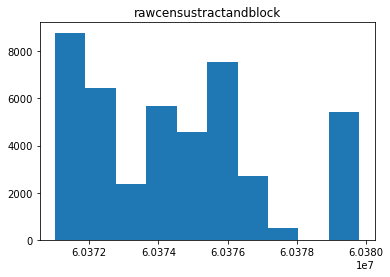

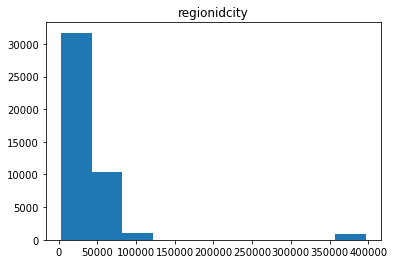

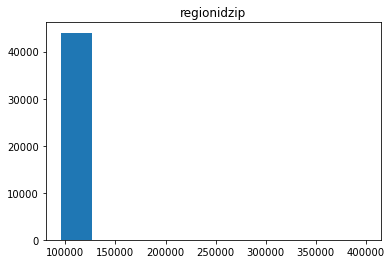

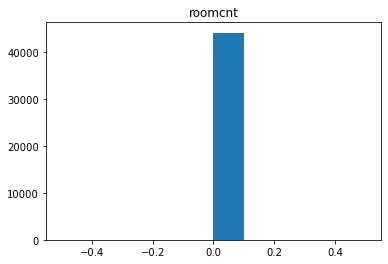

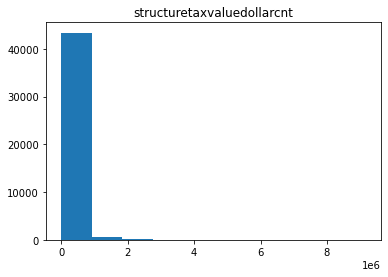

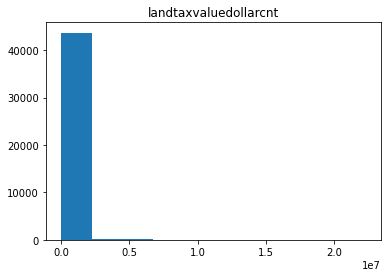

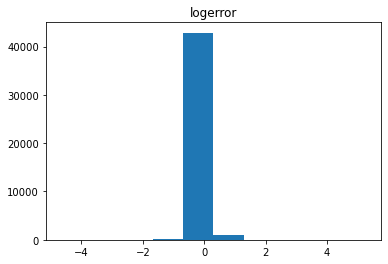

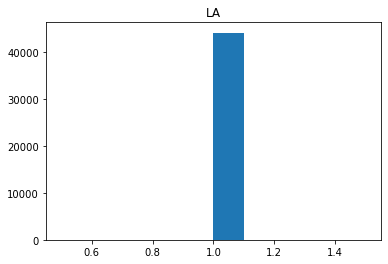

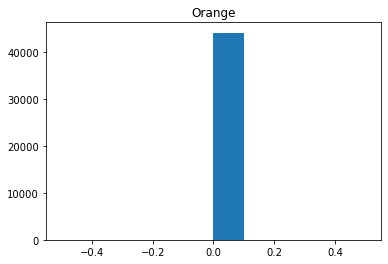

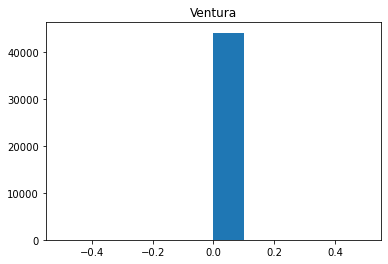

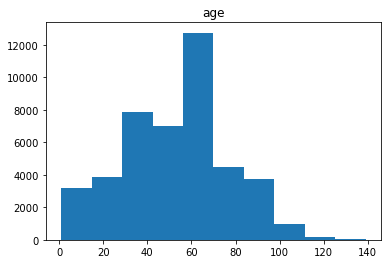

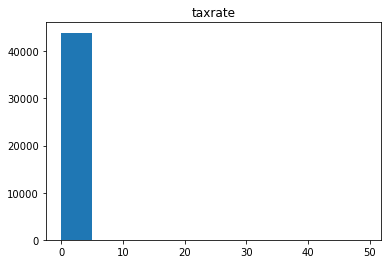

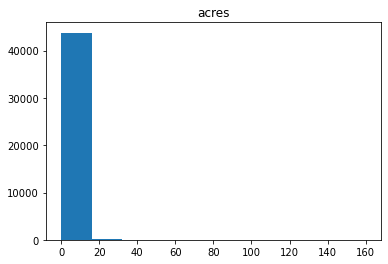

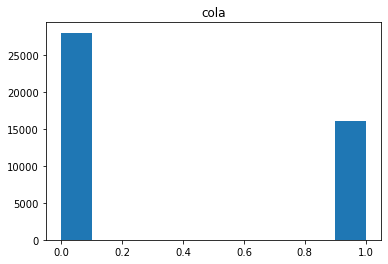

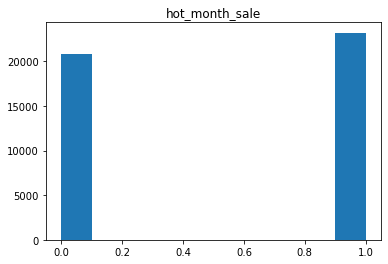

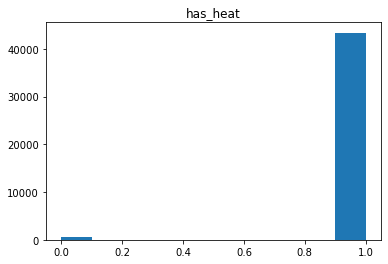

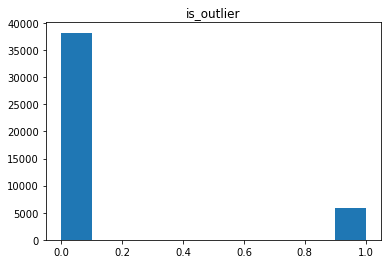

In [13]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [14]:
df.is_outlier.value_counts()

0    38220
1     5818
Name: is_outlier, dtype: int64

### Separate Counties in Individual Dataframes

In [15]:
#Create LA County Dataframe
df_la = df[df.LA == 1].drop(columns = ['LA', 'Ventura', 'Orange']) 
df_la.shape

(44038, 21)

In [16]:
#Create Ventura County df
df_vent = df[df.Ventura == 1].drop(columns = ['LA', 'Ventura', 'Orange']) 
df_vent.shape

(0, 21)

In [17]:
#Create Orange County df
df_orange = df[df.Orange == 1].drop(columns = ['LA', 'Ventura', 'Orange']) 
df_orange.shape

(0, 21)

#### Starting with Analysis for LA County Props

In [18]:
partitions = explore.split(df_la, target_var='logerror')

In [19]:
train = partitions[0]

In [20]:
#Separate logerror into quantiles
train['logerror_class'] = pd.qcut(train.logerror, q=4, labels=['q1', 'q2', 'q3', 'q4'])

In [21]:
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidzip', 'roomcnt', 'structuretaxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'logerror', 'age', 'taxrate', 'acres', 'cola',
       'hot_month_sale', 'has_heat', 'is_outlier', 'logerror_class'],
      dtype='object')

In [25]:
categorical_target = 'logerror_class'
continuous_target = 'logerror'
binary_vars = ['hot_month_sale', 'has_heat','is_outlier', 'cola']
quant_vars = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip', 'roomcnt',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt',
       'age', 'taxrate', 'acres']

In [23]:
#explore.explore_univariate(train, binary_vars, quant_vars)

hot_month_sale 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=76274080.0, pvalue=0.3828561376895179)
       chi2   p-value  degrees of freedom
0  3.455488  0.326581                   3

expected:
              0            1            2            3
0  2912.104213  2911.631929  2911.631929  2911.631929
1  3253.895787  3253.368071  3253.368071  3253.368071


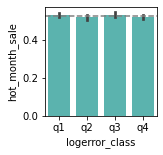


_____________________

has_heat 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=4459248.5, pvalue=0.5861601082543135)
        chi2   p-value  degrees of freedom
0  25.079254  0.000015                   3

expected:
              0           1           2           3
0    90.260979    90.24634    90.24634    90.24634
1  6075.739021  6074.75366  6074.75366  6074.75366


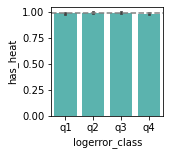


_____________________

is_outlier 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=35377491.5, pvalue=0.51173617886531)
       chi2       p-value  degrees of freedom
0  59.33436  8.155366e-13                   3

expected:
              0            1            2            3
0  5344.150034  5343.283322  5343.283322  5343.283322
1   821.849966   821.716678   821.716678   821.716678


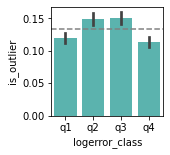


_____________________

cola 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=71229588.5, pvalue=0.0598315221532845)
      chi2       p-value  degrees of freedom
0  132.463  1.593143e-28                   3

expected:
            0            1            2            3
0  3934.7286  3934.090467  3934.090467  3934.090467
1  2231.2714  2230.909533  2230.909533  2230.909533


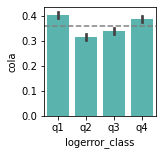


_____________________

bathroomcnt 
____________________



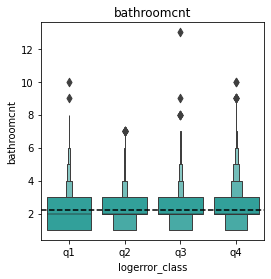

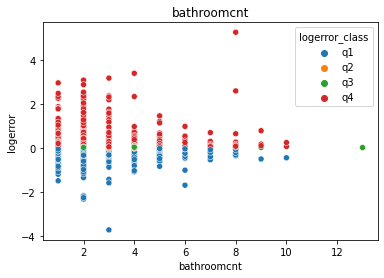

logerror_class           q1           q2           q3           q4
count           6166.000000  6165.000000  6165.000000  6165.000000
mean               2.114175     2.177129     2.224169     2.308191
std                0.958305     0.867296     0.915314     1.132841
min                1.000000     1.000000     1.000000     1.000000
25%                1.000000     2.000000     2.000000     2.000000
50%                2.000000     2.000000     2.000000     2.000000
75%                3.000000     3.000000     3.000000     3.000000
max               10.000000     7.000000    13.000000    10.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.058314546522294876, pvalue=4.957121410387311e-20)

____________________

bedroomcnt 
____________________



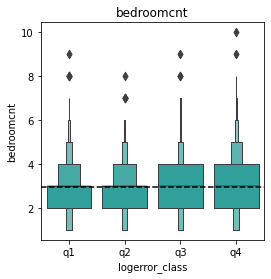

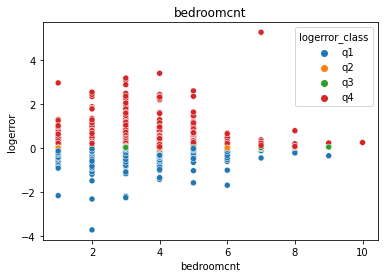

logerror_class           q1           q2           q3           q4
count           6166.000000  6165.000000  6165.000000  6165.000000
mean               2.887285     2.935118     2.951176     3.031955
std                0.953643     0.952135     0.981852     1.085470
min                1.000000     1.000000     1.000000     1.000000
25%                2.000000     2.000000     2.000000     2.000000
50%                3.000000     3.000000     3.000000     3.000000
75%                3.000000     3.000000     4.000000     4.000000
max                9.000000     8.000000     9.000000    10.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.04501688727731541, pvalue=1.520590061503949e-12)

____________________

buildingqualitytypeid 
____________________



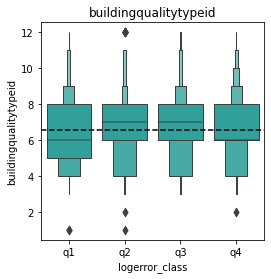

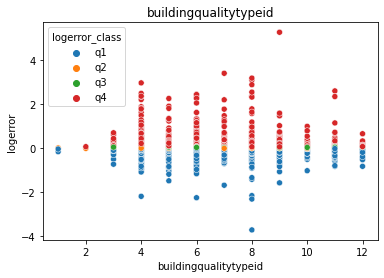

logerror_class           q1           q2           q3           q4
count           6166.000000  6165.000000  6165.000000  6165.000000
mean               6.443399     6.634712     6.670560     6.561719
std                1.709463     1.621030     1.621357     1.772041
min                1.000000     1.000000     3.000000     2.000000
25%                5.000000     6.000000     6.000000     6.000000
50%                6.000000     7.000000     7.000000     6.000000
75%                8.000000     8.000000     8.000000     8.000000
max               12.000000    12.000000    12.000000    12.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.01944273144477616, pvalue=0.0022627497151115213)

____________________

calculatedfinishedsquarefeet 
____________________



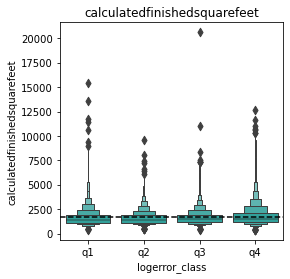

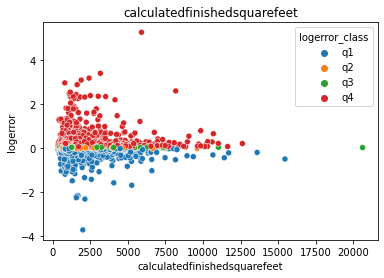

logerror_class            q1           q2            q3            q4
count            6166.000000  6165.000000   6165.000000   6165.000000
mean             1627.399124  1600.307543   1655.716139   1821.562044
std               885.106438   727.131733    817.895978   1105.266652
min               360.000000   448.000000    400.000000    360.000000
25%              1107.000000  1123.000000   1141.000000   1145.000000
50%              1405.500000  1431.000000   1464.000000   1503.000000
75%              1864.000000  1859.000000   1948.000000   2143.000000
max             15450.000000  9611.000000  20612.000000  12616.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0614918889393139, pvalue=4.236522393729365e-22)

____________________

latitude 
____________________



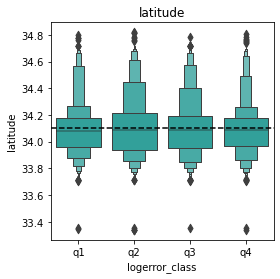

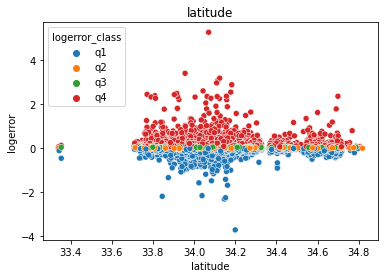

logerror_class           q1           q2           q3           q4
count           6166.000000  6165.000000  6165.000000  6165.000000
mean              34.098114    34.118244    34.107633    34.093856
std                0.209429     0.241430     0.224133     0.202480
min               33.344289    33.339527    33.354200    33.341224
25%               33.964077    33.941893    33.953500    33.965775
50%               34.080760    34.089436    34.089261    34.087000
75%               34.179126    34.212535    34.196009    34.174090
max               34.796863    34.818767    34.786807    34.806955 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.0010822434121136185, pvalue=0.8650533867280294)

____________________

longitude 
____________________



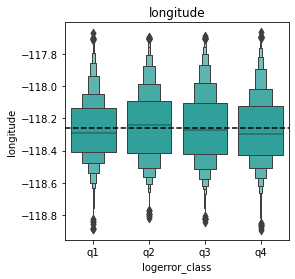

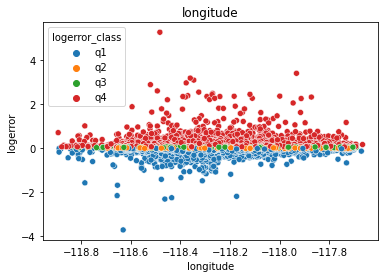

logerror_class           q1           q2           q3           q4
count           6166.000000  6165.000000  6165.000000  6165.000000
mean            -118.267903  -118.241923  -118.254874  -118.270669
std                0.195665     0.219317     0.223673     0.217278
min             -118.889223  -118.815306  -118.842166  -118.892812
25%             -118.410718  -118.414049  -118.424000  -118.428505
50%             -118.288000  -118.242000  -118.275025  -118.298006
75%             -118.134000  -118.094460  -118.107000  -118.124330
max             -117.671259  -117.697400  -117.691958  -117.666454 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.010915315114280368, pvalue=0.08651298043111828)

____________________

rawcensustractandblock 
____________________



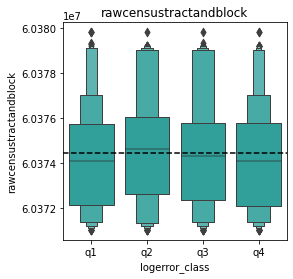

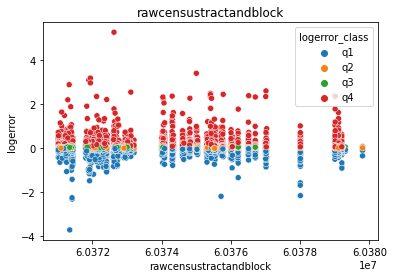

logerror_class            q1            q2            q3            q4
count           6.166000e+03  6.165000e+03  6.165000e+03  6.165000e+03
mean            6.037426e+07  6.037467e+07  6.037453e+07  6.037426e+07
std             2.435137e+03  2.574175e+03  2.532710e+03  2.418516e+03
min             6.037101e+07  6.037101e+07  6.037101e+07  6.037101e+07
25%             6.037212e+07  6.037262e+07  6.037236e+07  6.037208e+07
50%             6.037408e+07  6.037461e+07  6.037430e+07  6.037408e+07
75%             6.037574e+07  6.037603e+07  6.037578e+07  6.037575e+07
max             6.037980e+07  6.037980e+07  6.037980e+07  6.037980e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.000927374965039417, pvalue=0.8842166767619533)

____________________

regionidcity 
____________________



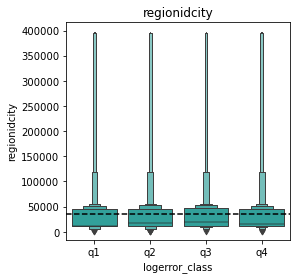

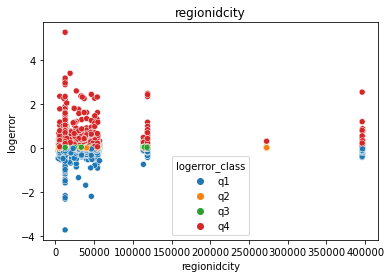

logerror_class             q1             q2             q3             q4
count             6166.000000    6165.000000    6165.000000    6165.000000
mean             35705.144016   35134.783293   36556.437470   34932.266991
std              61979.222605   56353.254716   58925.630835   57266.668134
min               3491.000000    3491.000000    3491.000000    3491.000000
25%              12447.000000   12447.000000   12447.000000   12447.000000
50%              12447.000000   17882.000000   19177.000000   14542.000000
75%              45457.000000   45602.000000   46298.000000   45457.000000
max             396556.000000  396556.000000  396556.000000  396556.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.02089300171467001, pvalue=0.0010336955646206153)

____________________

regionidzip 
____________________



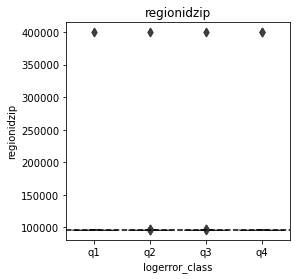

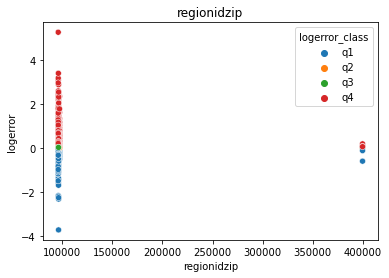

logerror_class             q1             q2             q3             q4
count             6166.000000    6165.000000    6165.000000    6165.000000
mean             96415.811872   96486.635361   96456.603406   96516.068451
std               5473.108416    5474.064410    5472.505837    7731.330557
min              95982.000000   95982.000000   95982.000000   95982.000000
25%              96101.000000   96163.000000   96152.000000   96117.000000
50%              96242.000000   96327.000000   96321.000000   96268.000000
75%              96412.000000   96464.000000   96446.000000   96415.000000
max             399675.000000  399675.000000  399675.000000  399675.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.02099927353224169, pvalue=0.0009741608344078161)

____________________

roomcnt 
____________________



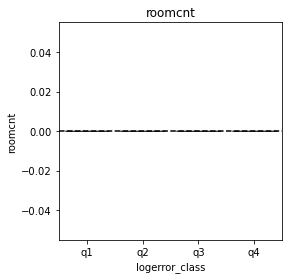

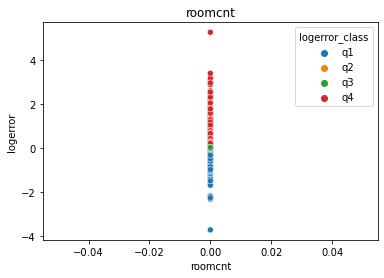

logerror_class      q1      q2      q3      q4
count           6166.0  6165.0  6165.0  6165.0
mean               0.0     0.0     0.0     0.0
std                0.0     0.0     0.0     0.0
min                0.0     0.0     0.0     0.0
25%                0.0     0.0     0.0     0.0
50%                0.0     0.0     0.0     0.0
75%                0.0     0.0     0.0     0.0
max                0.0     0.0     0.0     0.0 


Spearman's Correlation Test:
 SpearmanrResult(correlation=nan, pvalue=nan)

____________________

structuretaxvaluedollarcnt 
____________________



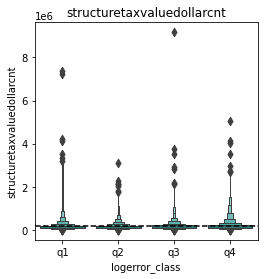

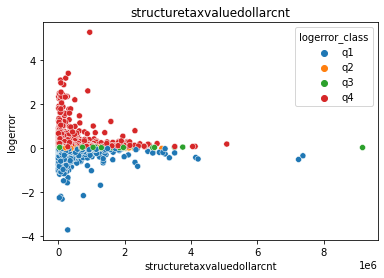

logerror_class            q1            q2            q3            q4
count           6.166000e+03  6.165000e+03  6.165000e+03  6.165000e+03
mean            1.786860e+05  1.694773e+05  1.829880e+05  1.994280e+05
std             2.618915e+05  1.597030e+05  2.252875e+05  2.698598e+05
min             3.282000e+03  1.810000e+02  2.918000e+03  1.320000e+02
25%             7.528850e+04  8.753500e+04  8.912500e+04  7.505400e+04
50%             1.240000e+05  1.335750e+05  1.377700e+05  1.261950e+05
75%             1.984432e+05  2.001660e+05  2.111720e+05  2.180390e+05
max             7.370009e+06  3.120707e+06  9.164901e+06  5.076250e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.019864673330786054, pvalue=0.0018105839106802128)

____________________

landtaxvaluedollarcnt 
____________________



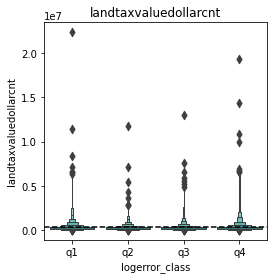

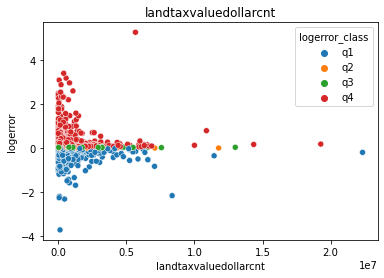

logerror_class            q1            q2            q3            q4
count           6.166000e+03  6.165000e+03  6.165000e+03  6.165000e+03
mean            3.017554e+05  2.446839e+05  2.707359e+05  3.243904e+05
std             5.675600e+05  3.405194e+05  4.017745e+05  6.162585e+05
min             1.393000e+03  4.242000e+03  6.186000e+03  1.610000e+02
25%             6.003300e+04  6.091500e+04  6.896600e+04  5.874000e+04
50%             1.715790e+05  1.670000e+05  1.835150e+05  1.712780e+05
75%             3.494438e+05  3.116940e+05  3.342800e+05  3.670350e+05
max             2.233550e+07  1.177498e+07  1.299520e+07  1.926944e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.00833961612745046, pvalue=0.19033295124393446)

____________________

age 
____________________



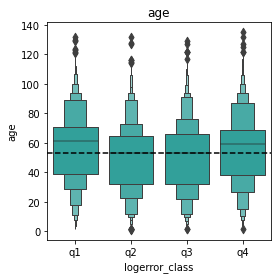

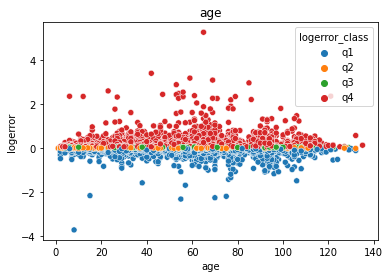

logerror_class           q1           q2           q3           q4
count           6166.000000  6165.000000  6165.000000  6165.000000
mean              57.758514    49.975994    50.331062    55.937388
std               23.890346    22.818133    23.462374    24.054664
min                2.000000     1.000000     2.000000     2.000000
25%               39.000000    32.000000    32.000000    38.000000
50%               61.000000    53.000000    53.000000    59.000000
75%               71.000000    65.000000    66.000000    69.000000
max              132.000000   132.000000   129.000000   135.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.02789021959404905, pvalue=1.1842889332959356e-05)

____________________

taxrate 
____________________



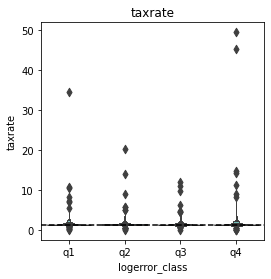

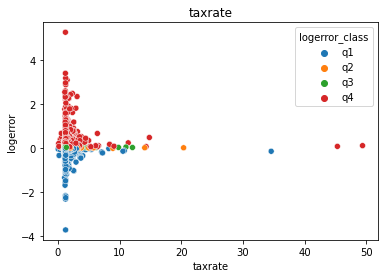

logerror_class           q1           q2           q3           q4
count           6166.000000  6165.000000  6165.000000  6165.000000
mean               1.374051     1.373481     1.349018     1.380428
std                0.573738     0.435675     0.351405     0.946943
min                0.022955     0.100807     0.148926     0.107132
25%                1.208602     1.209372     1.206863     1.209124
50%                1.247126     1.251742     1.245672     1.248629
75%                1.384993     1.402976     1.373953     1.370969
max               34.555298    20.355610    12.063679    49.364739 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.007762323391027633, pvalue=0.22286774096453782)

____________________

acres 
____________________



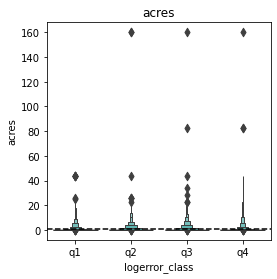

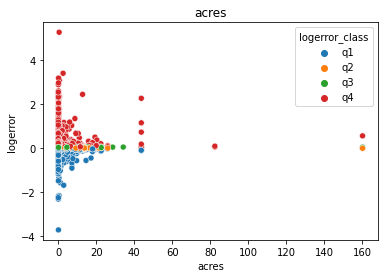

logerror_class           q1           q2           q3           q4
count           6166.000000  6165.000000  6165.000000  6165.000000
mean               0.775517     0.957815     0.967724     0.852481
std                2.332231     3.752606     3.331157     3.541746
min                0.020868     0.019858     0.025803     0.021373
25%                0.137787     0.139945     0.140335     0.140220
50%                0.171625     0.172727     0.173737     0.178191
75%                0.344244     0.395500     0.425275     0.394100
max               43.713613   160.032369   160.032369   160.032369 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.026064885214803744, pvalue=4.2459682264914935e-05)

____________________



In [26]:
explore.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

**Multivariate Takeaways:**
- Latitude vs Logerror: There is a latitude (>34.3) where log error is more centered around 0
    - Runs stats test for this
- As structuretaxvaluedollarcnt increases, logerror is more centered around 0